<a href="https://colab.research.google.com/github/rehabm1996/Task/blob/main/week3_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [153]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import seaborn as sns

## Load the Data

In [75]:
df = pd.read_csv('/content/drive/MyDrive/T5/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv')

In [76]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [77]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [78]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


In [79]:
df.shape

(52000, 26)

In [80]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [81]:
df.duplicated().sum()

43

In [82]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [84]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,39035
2.0,8199
3.0,2367
4.0,844
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [85]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37734
Darkness: Street lights present and lit,10130
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,536
Darkness: Street lights present but unlit,245


In [86]:
df['Urban_or_Rural_Area'].value_counts()

,count
Urban_or_Rural_Area,
1.0,33256
2.0,18655
3.0,1


In [83]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,43927
2.0,7086
1.0,665


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [87]:
df = df[(np.abs(stats.zscore(df)) < 2.9).all(axis=1)]

TypeError: can only concatenate str (not "float") to str

In [88]:
df.drop('Accident_Severity' , axis=1 , inplace=True)

In [89]:
df.drop('Number_of_Casualties' , axis=1 , inplace=True)

In [90]:
df.drop('Light_Conditions' , axis=1 , inplace=True)
df.drop('Urban_or_Rural_Area' , axis=1 , inplace=True)

In [91]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Number_of_Vehicles,0
Date,0
Day_of_Week,0
Local_Authority_(District),0
Local_Authority_(Highway),0


In [92]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Number_of_Vehicles,int64
Date,object
Day_of_Week,int64
Local_Authority_(District),int64
Local_Authority_(Highway),object


In [93]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-93-b9c6864122be>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [94]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Number_of_Vehicles,int64
Date,datetime64[ns]
Day_of_Week,int64
Local_Authority_(District),int64
Local_Authority_(Highway),object


In [95]:
df = pd.get_dummies(df, columns=['Pedestrian_Crossing-Human_Control'])
df = pd.get_dummies(df, columns=['Pedestrian_Crossing-Physical_Facilities'])
df = pd.get_dummies(df, columns=['Weather_Conditions'])
df = pd.get_dummies(df, columns=['Road_Surface_Conditions'])
df = pd.get_dummies(df, columns=['Did_Police_Officer_Attend_Scene_of_Accident'])
df = pd.get_dummies(df, columns=['Road_Type'])
df = pd.get_dummies(df, columns=['Local_Authority_(Highway)'])

In [109]:
for column in df.columns:
  if df[column].dtype == bool:
    df[column] = df[column].astype(int)

In [110]:
scaler =StandardScaler()
sc = scaler.fit_transform(df)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [111]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class',
       ...
       'Local_Authority_(Highway)_W06000014',
       'Local_Authority_(Highway)_W06000015',
       'Local_Authority_(Highway)_W06000016',
       'Local_Authority_(Highway)_W06000018',
       'Local_Authority_(Highway)_W06000019',
       'Local_Authority_(Highway)_W06000020',
       'Local_Authority_(Highway)_W06000021',
       'Local_Authority_(Highway)_W06000022',
       'Local_Authority_(Highway)_W06000023',
       'Local_Authority_(Highway)_W06000024'],
      dtype='object', length=253)

In [112]:
df.head(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Date,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Local_Authority_(Highway)_W06000014,Local_Authority_(Highway)_W06000015,Local_Authority_(Highway)_W06000016,Local_Authority_(Highway)_W06000018,Local_Authority_(Highway)_W06000019,Local_Authority_(Highway)_W06000020,Local_Authority_(Highway)_W06000021,Local_Authority_(Highway)_W06000022,Local_Authority_(Highway)_W06000023,Local_Authority_(Highway)_W06000024
0,560530.0,103950.0,0.277298,50.812789,47,1,2009-11-27,6,556,3,...,0,0,0,0,0,0,0,0,0,0
1,508860.0,187170.0,-0.430574,51.572846,1,2,2010-10-10,1,26,4,...,0,0,0,0,0,0,0,0,0,0
2,314460.0,169130.0,-3.231459,51.414661,62,2,2005-09-14,4,746,6,...,1,0,0,0,0,0,0,0,0,0
3,341700.0,408330.0,-2.881800,53.568318,4,1,2007-08-18,7,84,6,...,0,0,0,0,0,0,0,0,0,0
4,386488.0,350090.0,-2.203020,53.047882,21,2,2013-08-06,3,257,6,...,0,0,0,0,0,0,0,0,0,0
5,454560.0,285350.0,-1.198372,52.463345,33,2,2006-12-31,1,363,3,...,0,0,0,0,0,0,0,0,0,0
6,418370.0,563150.0,-1.714623,54.962668,10,3,2007-01-10,4,146,6,...,0,0,0,0,0,0,0,0,0,0
7,424700.0,562370.0,-1.615830,54.955386,10,1,2006-06-10,7,146,6,...,0,0,0,0,0,0,0,0,0,0
8,423860.0,573983.0,-1.627982,55.059784,10,2,2013-01-30,4,148,4,...,0,0,0,0,0,0,0,0,0,0
9,317370.0,569840.0,-3.293806,55.016244,98,2,2012-08-08,4,917,4,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [114]:
df1 = df[['Longitude' ,'Latitude' ,'Number_of_Vehicles' ,'Date' ,'Police_Force']]

In [125]:
pca = PCA(n_components=2)
pca1 = pca.fit_transform(df1)

DTypePromotionError: The DType <class 'numpy.dtypes.Float64DType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

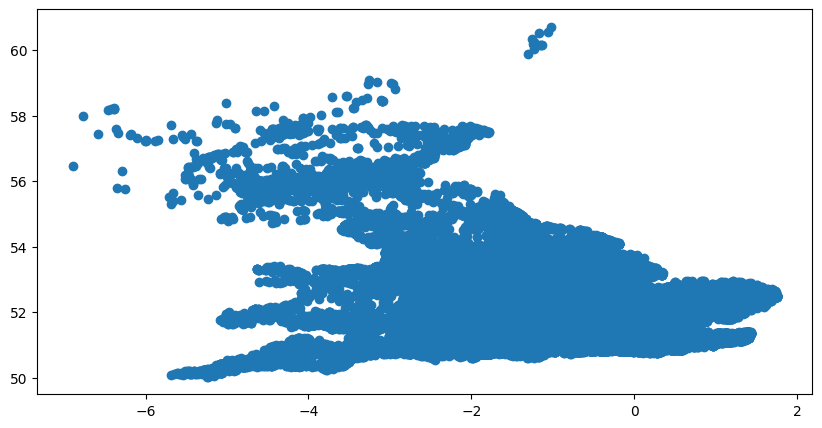

In [116]:
plt.figure(figsize=(10,5))
plt.scatter(df1['Longitude'] , df1['Latitude'])
plt.show()

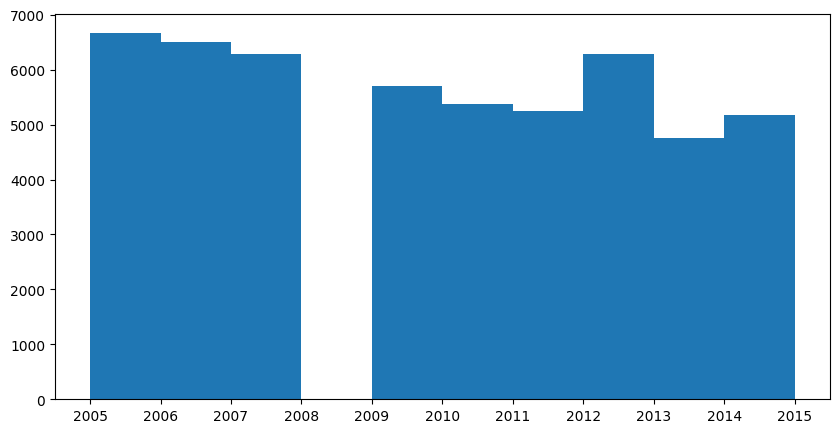

In [161]:
plt.figure(figsize=(10,5))
plt.hist(df1['Date'])
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [161]:
see = []
for k in range(1,11):
  km = KMeans(n_clusters=k , random_state=42)
  km.fit(km)
  see.append(km.inirtla_)

In [161]:
km.cluster_centers_

In [161]:
pred = km.predict(pca1)

In [161]:
km = KMeans(centers=3 , n_estimators=50)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [161]:
acc = accuracy_score(pred)
print(acc)

## Plot the data points with their predicted cluster center

In [161]:
plt.figure(figsize=(10,5))
plt.scatter(df1[:,0] , df1[:,1] , c =pred , marker='^')

for center in km:
  center = center[:2]
  plt.scatter(center[0] , center[1])
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?